In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [293]:
playas = pd.read_pickle('player_season_totals.pickle')

In [294]:
df = pd.DataFrame(playas, columns=playas[0].keys())

In [295]:
df=df.sort_values(by=['player','season']).reset_index().drop('index',axis=1)

In [296]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [297]:
# https://help.yahoo.com/kb/fantasy-basketball/default-league-settings-fantasy-basketball-sln6919.html
# yahoo's fantasy scoring system
pts = 1
reb = 1.2
ast = 1.5
blk = 3
stl = 3
tov = -1

In [298]:
df['ftsy_pts']=(df.pts*1)+(df.trb*1.2)+(df.ast*1.5)+(df.blk*3)+(df.stl*3)-(df.tov)

In [299]:
df = df.merge(df.groupby('player').min()[['age']],how='left', left_on='player', right_index=True, suffixes=('','_min'))

In [300]:
df['experience'] = df.age - df.age_min

In [305]:
df.season = [int(s[:4])+1 for s in df.season]

In [313]:
df = df[df.season>1981]

In [632]:
pos_df = pd.DataFrame(pd.read_pickle('player_positions.pickle'))

In [633]:
pos_df

,p_id,player,pos
0,abdelal01,Alaa Abdelnaby,Power Forward
1,abdulza01,Zaid Abdul-Aziz,Center and Power Forward
2,abdulka01,Kareem Abdul-Jabbar,Center
3,abdulma02,Mahmoud Abdul-Rauf,Point Guard
4,abdulta01,Tariq Abdul-Wahad,Shooting Guard
5,abdursh01,Shareef Abdur-Rahim,Small Forward and Power Forward and Center
6,abernto01,Tom Abernethy,Small Forward and Power Forward
7,ablefo01,Forest Able,Guard
8,abramjo01,John Abramovic,Forward
9,abrinal01,Álex Abrines,Shooting Guard


In [431]:
df.head()

,player,age,team_id,lg_id,per,gs,ws,season,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
0,A.C. Green,22,LAL,NBA,11.8,1,3.3,1986,82,1542,209,388,208,382,1,6,102,167,160,221,381,54,49,49,99,229,521,0.539,0.545,0.167,0.540,0.611,0.564,1254.2,22,0
1,A.C. Green,23,LAL,NBA,15.7,72,7.6,1987,79,2240,316,587,316,582,0,5,220,282,210,405,615,84,70,80,102,171,852,0.538,0.543,0.000,0.538,0.780,0.599,2064.0,22,1
2,A.C. Green,24,LAL,NBA,14.5,64,7.9,1988,82,2636,322,640,322,638,0,2,293,379,245,465,710,93,87,45,120,204,937,0.503,0.505,0.000,0.503,0.773,0.581,2204.5,22,2
3,A.C. Green,25,LAL,NBA,17.8,82,9.4,1989,82,2510,401,758,397,741,4,17,282,359,258,481,739,103,94,55,119,172,1088,0.529,0.536,0.235,0.532,0.786,0.594,2457.3,22,3
4,A.C. Green,26,LAL,NBA,14.7,82,7.7,1990,82,2709,385,806,372,760,13,46,278,370,262,450,712,90,66,50,116,207,1061,0.478,0.489,0.283,0.486,0.751,0.548,2282.4,22,4


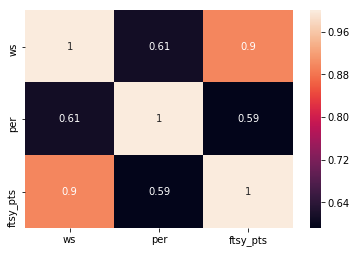

In [314]:
# plt.figure(figsize=(20,18))
sns.heatmap(df[['ws','per','ftsy_pts']].corr(), annot=True)
plt.show()

Win shares (ws) have a much higher correlation to fantasy points than player efficiency rating (per)

Thus predict win share to project next season performance

In [315]:
df.columns

Index(['player', 'age', 'team_id', 'lg_id', 'per', 'gs', 'ws', 'season', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_pct',
       'fg2_pct', 'fg3_pct', 'efg_pct', 'ft_pct', 'ts_pct', 'ftsy_pts',
       'age_min', 'experience'],
      dtype='object')

In [316]:
from statsmodels.formula.api import ols
lr_model = ols(formula='ws~pts+trb+ast+stl+blk+tov+ft_pct+fg_pct+fg3_pct+pf+mp+experience', data=df).fit()

In [317]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ws   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     7326.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:41:29   Log-Likelihood:                -20586.
No. Observations:               13283   AIC:                         4.120e+04
Df Residuals:                   13270   BIC:                         4.130e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3666      0.099    -34.048      0.000      -3.560      -3.173
pts            0.0057   6.35e-05     90.498      0.000       0.006       0.006
trb            0.0068      0.000     60.470      0.000       0.007       0.007
ast            0.0102      0.000     64.877      0.000       0.010       0.011
stl            0.0130      0.001     25.110      0.000       0.012       0.014
blk            0.0086      0.000     20.780      0.000       0.008       0.009
tov           -0.0334      0.000    -68.663      0.000      -0.034      -0.032
ft_pct         0.9870      0.089     11.049      0.000       0.812       1.162
fg_pct         5.6938      0.175     32.616      0.000       5.352       6.036
fg3_pct        0.1775      0.064      2.764      0.006       0.052       0.303
pf            -0.0021      0.000     -6.819      0.000      -0.003      -0.002
mp            -0.0009   4.42e-05    -20.133      0.000      -0.001      -0.001
experience     0.0269      0.003     10.014      0.000       0.022       0.032
==============================================================================
Omnibus:                      918.597   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4097.139
Skew:                           0.182   Prob(JB):                         0.00
Kurtosis:                       5.696   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [635]:
df['missed_gms'] = 82-df.g

In [638]:
df[df.player == 'Kareem Abdul-Jabbar']

,player,age,team_id,lg_id,per,gs,ws,season,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience,missed_gms
8422,Kareem Abdul-Jabbar,34,LAL,NBA,23.4,76,10.7,1982,76,2677,753,1301,753,1298,0,3,312,442,172,487,659,225,63,207,230,224,1818,0.579,0.580,0.000,0.579,0.706,0.608,3526.3,34,0,6
8423,Kareem Abdul-Jabbar,35,LAL,NBA,23.6,79,10.9,1983,79,2554,722,1228,722,1226,0,2,278,371,167,425,592,200,61,170,200,220,1722,0.588,0.589,0.000,0.588,0.749,0.619,3225.4,34,1,3
8424,Kareem Abdul-Jabbar,36,LAL,NBA,21.3,80,8.9,1984,80,2622,716,1238,716,1237,0,1,285,394,169,418,587,211,55,143,221,211,1717,0.578,0.579,0.000,0.578,0.723,0.608,3110.9,34,2,2
8425,Kareem Abdul-Jabbar,37,LAL,NBA,22.9,79,11.2,1985,79,2630,723,1207,723,1206,0,1,289,395,162,460,622,249,63,162,197,238,1735,0.599,0.600,0.000,0.599,0.732,0.628,3332.9,34,3,3
8426,Kareem Abdul-Jabbar,38,LAL,NBA,22.7,79,10.8,1986,79,2629,755,1338,755,1336,0,2,336,439,133,345,478,280,67,130,203,248,1846,0.564,0.565,0.000,0.564,0.765,0.603,3227.6,34,4,3
8427,Kareem Abdul-Jabbar,39,LAL,NBA,17.9,78,7.5,1987,78,2441,560,993,559,990,1,3,245,343,152,371,523,203,49,97,186,245,1366,0.564,0.565,0.333,0.564,0.714,0.597,2550.1,34,5,4
8428,Kareem Abdul-Jabbar,40,LAL,NBA,15.8,80,5.3,1988,80,2308,480,903,480,902,0,1,205,269,118,360,478,135,48,92,159,216,1165,0.532,0.532,0.000,0.532,0.762,0.570,2202.1,34,6,2
8429,Kareem Abdul-Jabbar,41,LAL,NBA,12.9,74,2.9,1989,74,1695,313,659,313,656,0,3,122,165,103,231,334,74,38,85,95,196,748,0.475,0.477,0.000,0.475,0.739,0.511,1533.8,34,7,8


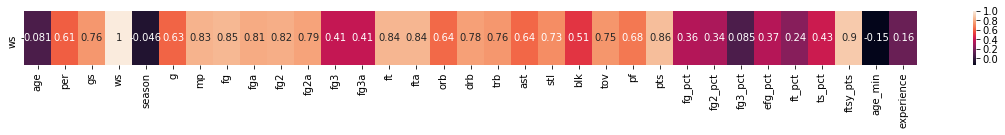

In [404]:
plt.figure(figsize=(20,1))
sns.heatmap(df.corr().iloc[[3],:], annot=True)

In [324]:
rookie_yrs = df[df.experience == 0]

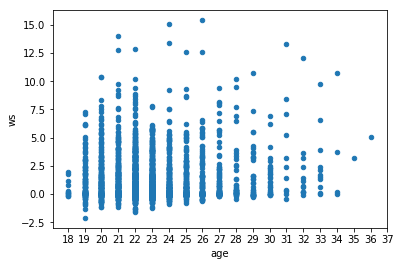

In [325]:
rookie_yrs.plot(kind='scatter', x='age', y='ws', xticks=range(18,38,1))

In [321]:
rookie_yrs.groupby('season').count().reset_index()

,season,player,age,team_id,lg_id,per,gs,ws,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
0,1982,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,237,300,296,300,300,300,300
1,1983,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,51,68,67,68,68,68,68
2,1984,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,34,56,53,56,56,56,56
3,1985,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,46,60,56,60,60,60,60
4,1986,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,41,61,59,62,62,62,62
5,1987,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,53,63,59,63,63,63,63
6,1988,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,42,59,57,59,59,59,59
7,1989,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,56,74,70,74,75,75,75
8,1990,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,60,78,75,78,78,78,78
9,1991,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,59,73,72,73,73,73,73


In [326]:
grp_rook = rookie_yrs.groupby('season').mean().reset_index()

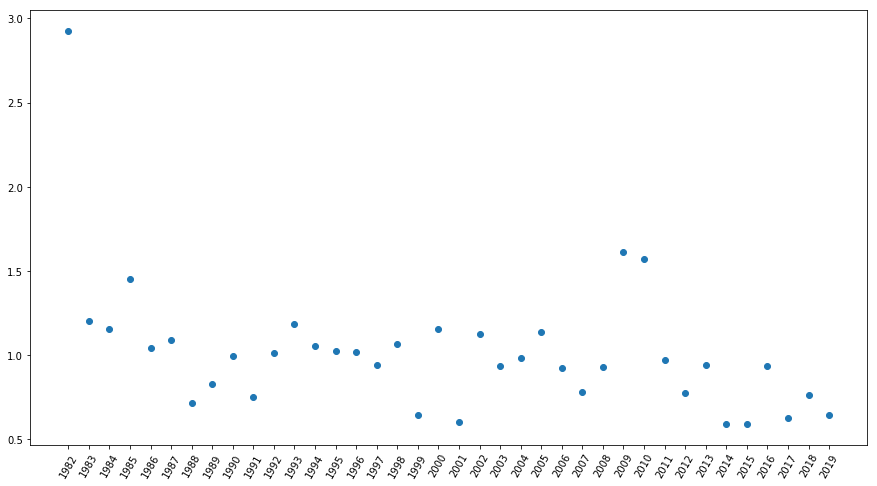

In [333]:
plt.figure(figsize=(15,8))
plt.scatter(data=grp_rook, x='season', y='ws')
plt.xticks(ticks=grp_rook.season, rotation=60)
plt.show()

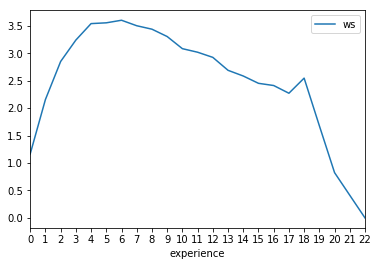

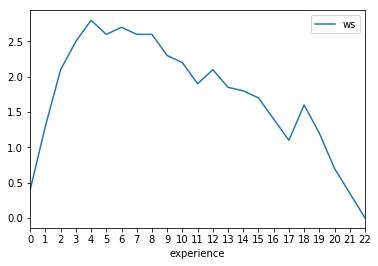

In [60]:
# displays relationship between average win share and years in NBA (0 experience is rookie year)
df.groupby('experience').mean()[['ws']].plot(xticks=range(0,23,1))
# displays relationship between median win share and years in NBA
df.groupby('experience').median()[['ws']].plot(xticks=range(0,23,1))

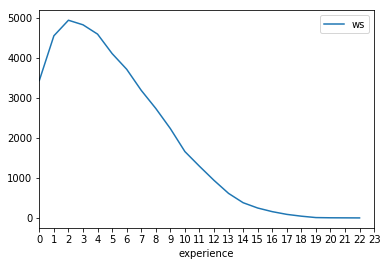

In [65]:
# displays relationship between win share and years in NBA
df.groupby('experience').sum()[['ws']].plot(xticks=range(0,24,1))

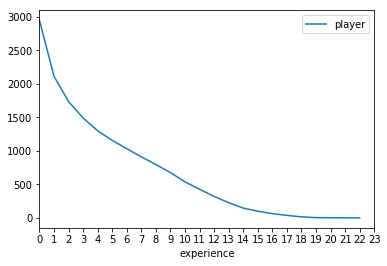

In [121]:
df.groupby('experience').count()[['player']].plot(xticks=range(0,24,1))

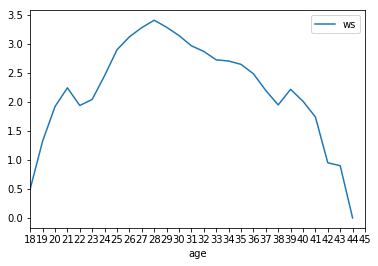

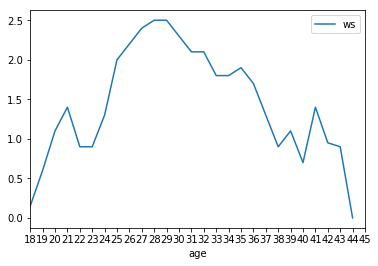

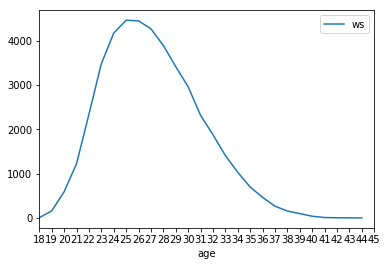

In [128]:
# at what age would most players reach their peak performance, on average?
df.groupby(['age']).mean()[['ws']].plot(xticks=range(18,46,1))

df.groupby(['age']).median()[['ws']].plot(xticks=range(18,46,1))

df.groupby(['age']).sum()[['ws']].plot(xticks=range(18,46,1))

In [349]:
max_exp_df = df.groupby('player').max()[['experience']]

In [356]:
max_exp_df[max_exp_df.experience == 19]

,experience
player,
Kobe Bryant,19


In [358]:
kobe_df = df[df.player == 'Kobe Bryant']

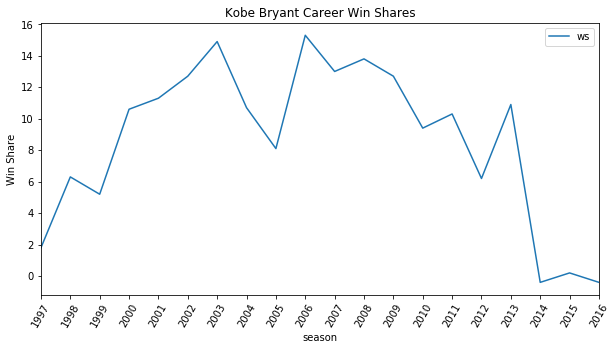

In [386]:
kobe_df.plot(x='season', y='ws', figsize=(10,5))
plt.xticks(ticks=kobe_df.season, rotation=60)
plt.title('Kobe Bryant Career Win Shares')
plt.ylabel('Win Share')
plt.show()

In [391]:
kobe_df.columns[8:]

Index(['g', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_pct',
       'fg2_pct', 'fg3_pct', 'efg_pct', 'ft_pct', 'ts_pct', 'ftsy_pts',
       'age_min', 'experience'],
      dtype='object')

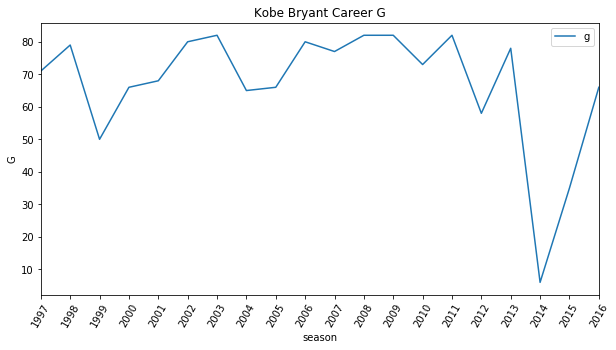

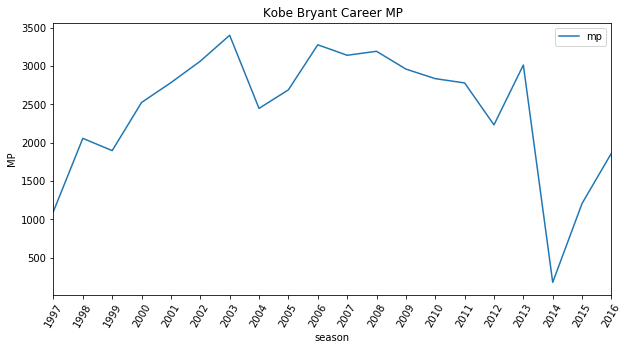

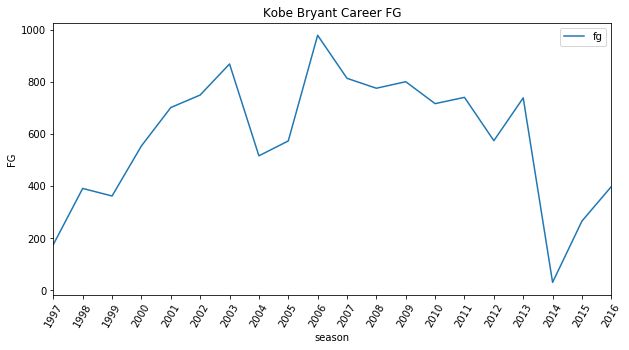

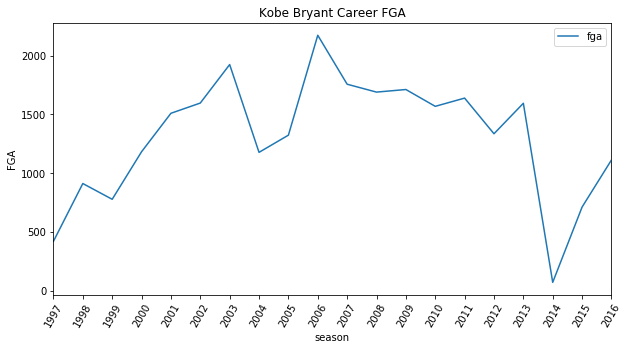

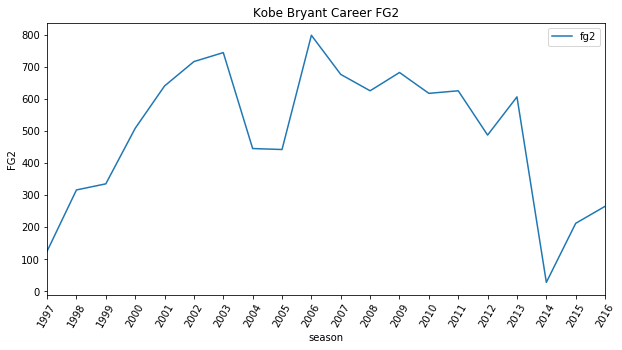

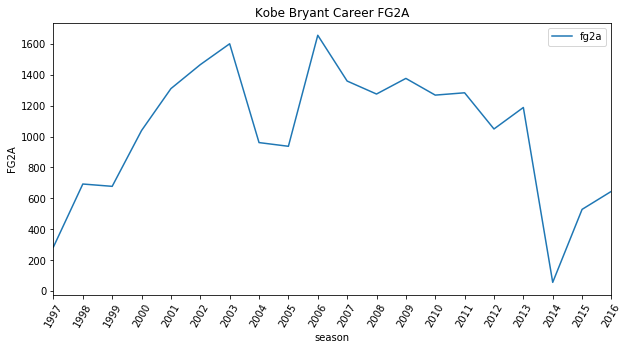

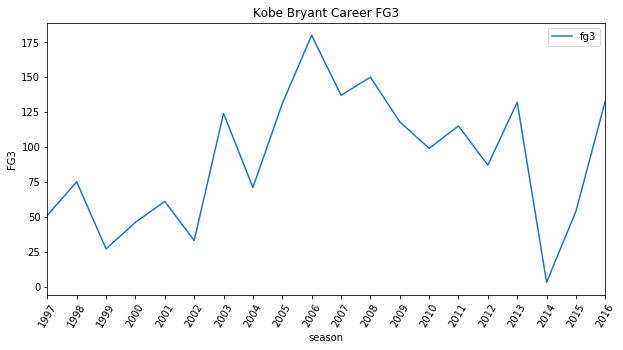

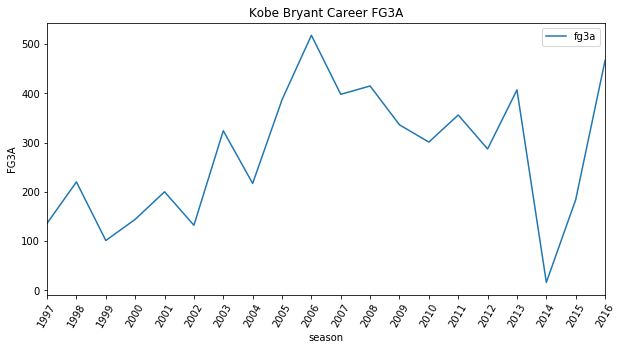

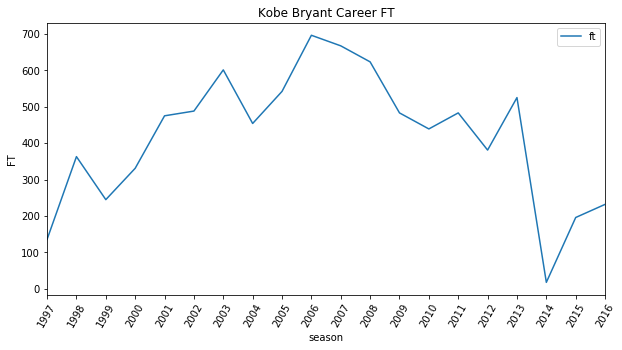

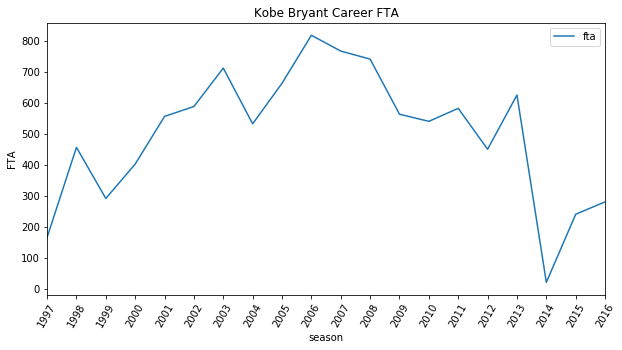

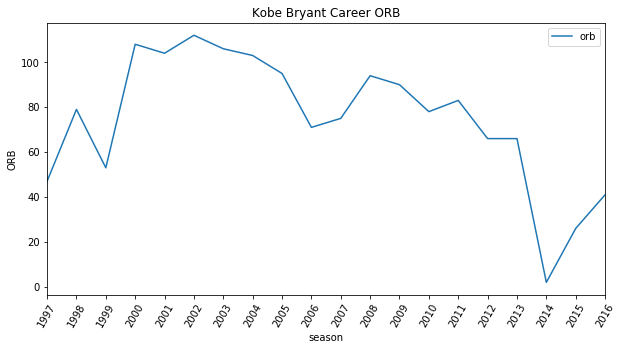

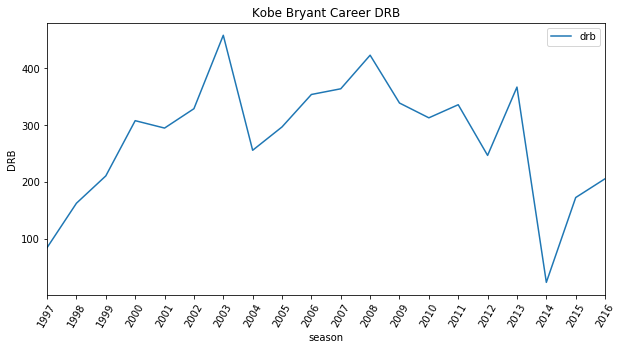

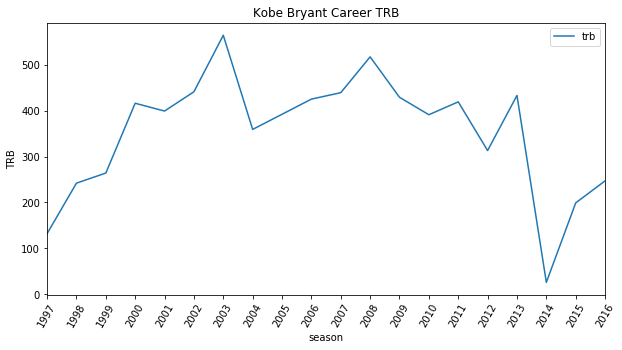

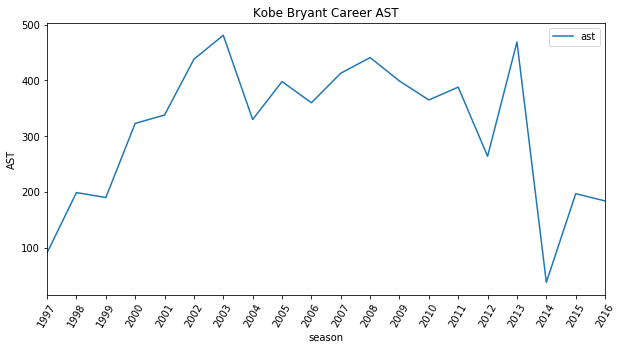

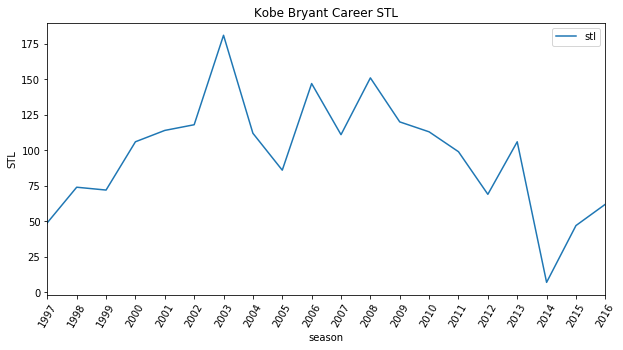

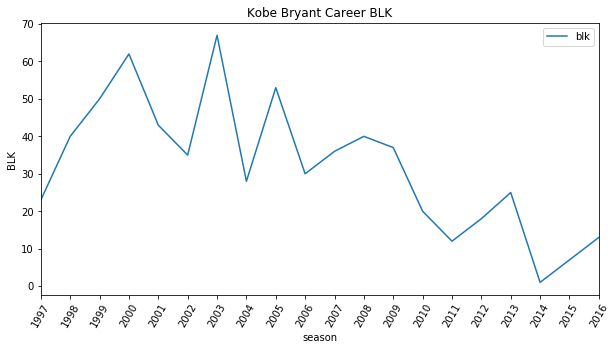

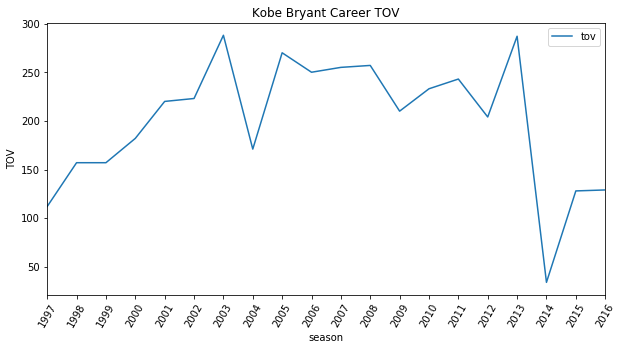

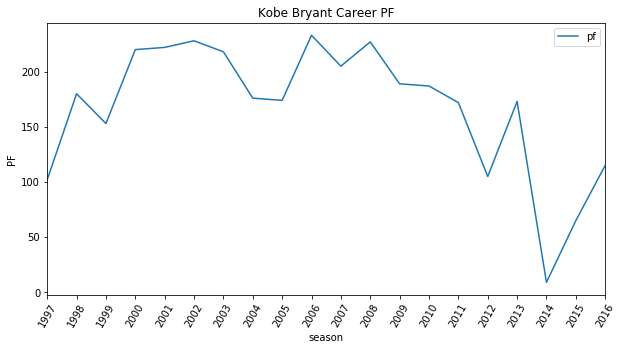

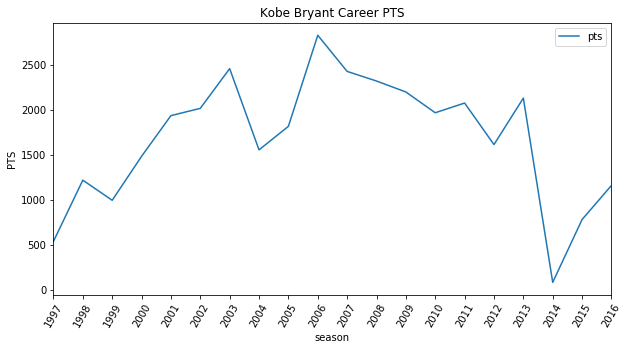

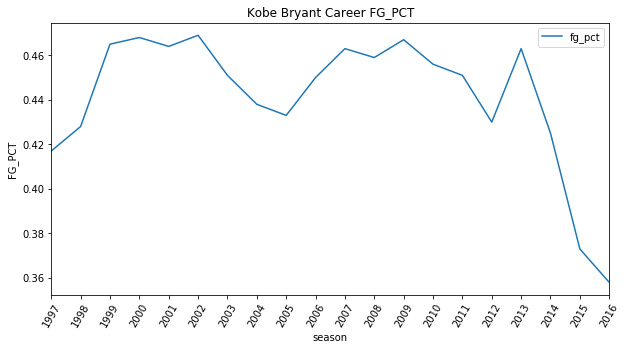

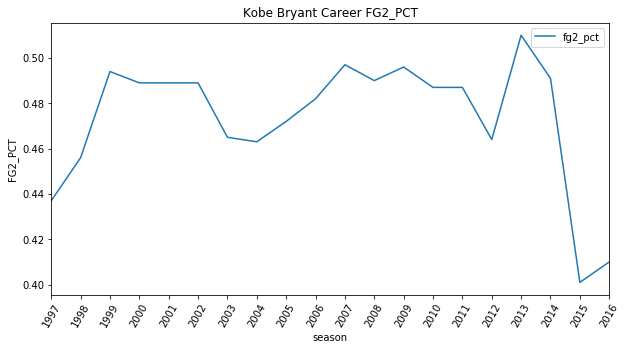

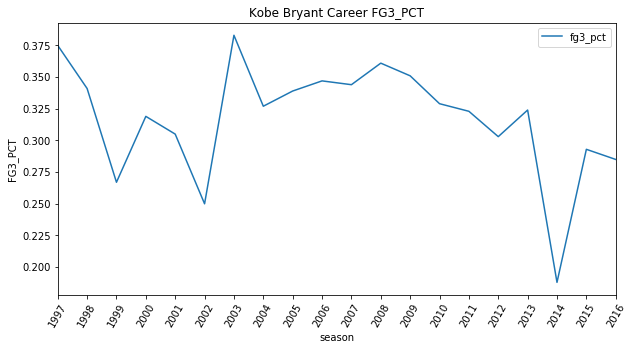

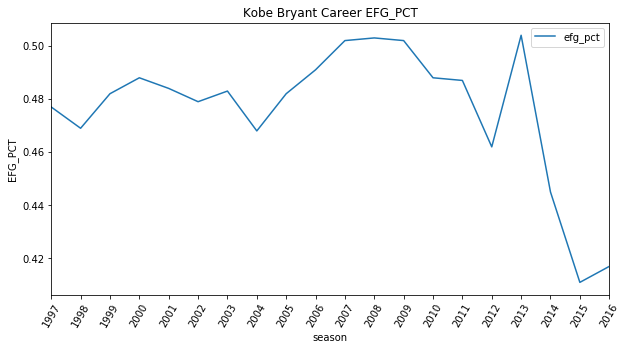

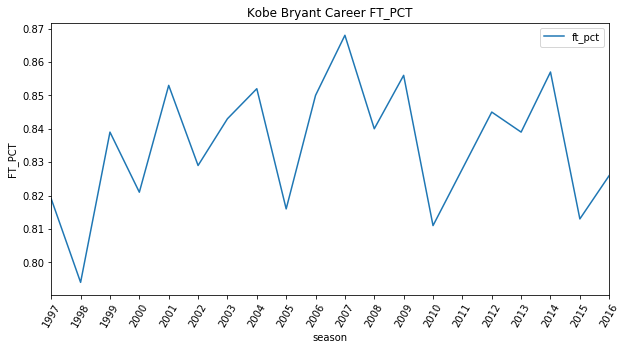

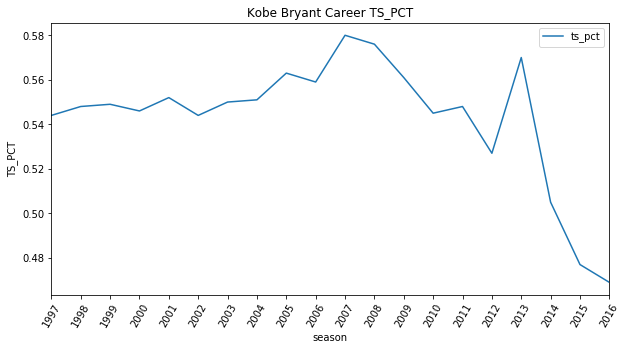

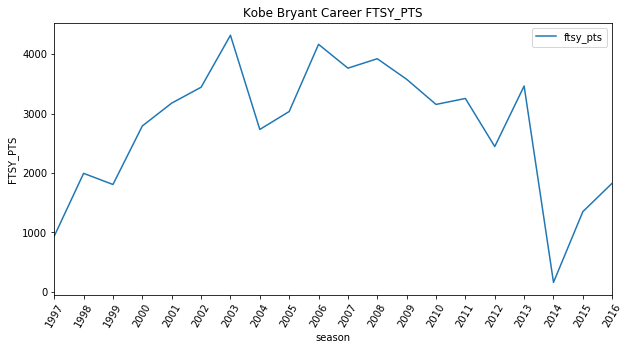

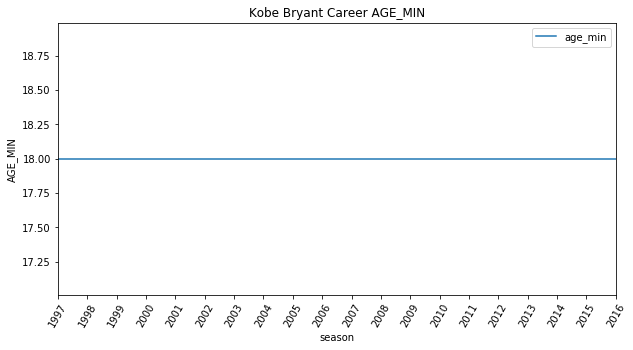

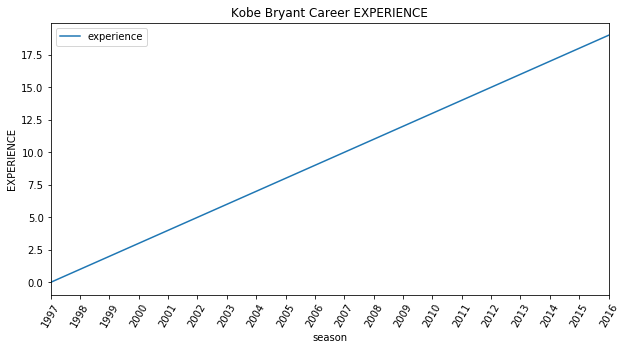

In [395]:
for col in kobe_df.columns[8:]:
    kobe_df.plot(x='season', y=col, figsize=(10,5))
    plt.xticks(ticks=kobe_df.season, rotation=60)
    plt.title(f'Kobe Bryant Career {col.upper()}')
    plt.ylabel(f'{col.upper()}')
    plt.show()

In [614]:
kobe_train = kobe_df[kobe_df.season<kobe_df.season.max()]

In [615]:
kobe_train.columns

Index(['player', 'age', 'team_id', 'lg_id', 'per', 'gs', 'ws', 'season', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_pct',
       'fg2_pct', 'fg3_pct', 'efg_pct', 'ft_pct', 'ts_pct', 'ftsy_pts',
       'age_min', 'experience'],
      dtype='object')

In [622]:
kobe_model = ols(formula='ws~age+pts+trb+ast+stl+blk+tov+ft_pct+fg2_pct+fg3_pct+pf+mp+experience', data=kobe_df).fit()

In [624]:
kobe_df['ws_pred'] = kobe_model.predict()

In [631]:
import numpy as np
np.sqrt((kobe_df.ws - kobe_df.ws_pred)**2)

9059    0.636920
9060    0.540493
9061    0.314605
9062    0.503670
9063    0.024240
9064    0.446263
9065    0.264465
9066    0.961766
9067    0.114086
9068    0.289450
9069    0.227256
9070    0.022783
9071    0.502581
9072    0.178756
9073    0.343047
9074    0.817858
9075    0.281344
9076    0.032274
9077    0.286016
9078    0.621803
dtype: float64

In [416]:
grouped_df = df.groupby(['player','season']).sum()

In [442]:
grouped_df.loc['Kobe Bryant']

,age,per,gs,ws,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997,18,14.4,6,1.8,71,1103,176,422,125,286,51,136,136,166,47,85,132,91,49,23,112,102,539,0.417,0.437,0.375,0.477,0.819,0.544,937.9,18,0
1998,19,18.5,1,6.3,79,2056,391,913,316,693,75,220,363,457,79,163,242,199,74,40,157,180,1220,0.428,0.456,0.341,0.469,0.794,0.548,1993.9,18,1
1999,20,18.9,50,5.2,50,1896,362,779,335,678,27,101,245,292,53,211,264,190,72,50,157,153,996,0.465,0.494,0.267,0.482,0.839,0.549,1806.8,18,2
2000,21,21.7,62,10.6,66,2524,554,1183,508,1039,46,144,331,403,108,308,416,323,106,62,182,220,1485,0.468,0.489,0.319,0.488,0.821,0.546,2790.7,18,3
2001,22,24.5,68,11.3,68,2783,701,1510,640,1310,61,200,475,557,104,295,399,338,114,43,220,222,1938,0.464,0.489,0.305,0.484,0.853,0.552,3174.8,18,4
2002,23,23.2,80,12.7,80,3063,749,1597,716,1465,33,132,488,589,112,329,441,438,118,35,223,228,2019,0.469,0.489,0.250,0.479,0.829,0.544,3441.2,18,5
2003,24,26.2,82,14.9,82,3401,868,1924,744,1600,124,324,601,713,106,458,564,481,181,67,288,218,2461,0.451,0.465,0.383,0.483,0.843,0.550,4315.3,18,6
2004,25,23.7,64,10.7,65,2447,516,1178,445,961,71,217,454,533,103,256,359,330,112,28,171,176,1557,0.438,0.463,0.327,0.468,0.852,0.551,2731.8,18,7
2005,26,23.3,66,8.1,66,2689,573,1324,442,937,131,387,542,664,95,297,392,398,86,53,270,174,1819,0.433,0.472,0.339,0.482,0.816,0.563,3033.4,18,8


In [446]:
rookies_1982 = rookie_yrs[rookie_yrs.season==1982]

In [450]:
rookies_1982.sort_values(by='ws', ascending=False).head(10)

,player,age,team_id,lg_id,per,gs,ws,season,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
11321,Moses Malone,26,HOU,NBA,26.8,81,15.4,1982,81,3398,945,1822,945,1816,0,6,630,827,558,630,1188,142,76,125,294,208,2520,0.519,0.520,0.000,0.519,0.762,0.576,4467.6,26,0
13948,Sidney Moncrief,24,MIL,NBA,20.1,80,13.4,1982,80,2980,556,1063,555,1049,1,14,468,573,221,313,534,382,138,22,208,206,1581,0.523,0.529,0.071,0.524,0.817,0.601,3066.8,24,0
8315,Julius Erving,31,PHI,NBA,25.9,81,13.3,1982,81,2789,780,1428,777,1417,3,11,411,539,220,337,557,319,161,141,214,229,1974,0.546,0.548,0.273,0.547,0.763,0.593,3812.9,31,0
9907,Magic Johnson,22,LAL,NBA,22.9,77,12.9,1982,78,2991,556,1036,550,1007,6,29,329,433,252,499,751,743,208,34,286,223,1447,0.537,0.546,0.207,0.540,0.760,0.590,3902.7,22,0
138,Adrian Dantley,25,UTA,NBA,24.2,81,12.6,1982,81,3222,904,1586,903,1583,1,3,648,818,231,283,514,324,95,14,299,252,2457,0.570,0.570,0.333,0.570,0.792,0.631,3587.8,25,0
6479,Jack Sikma,26,SEA,NBA,20.6,82,12.6,1982,82,3049,581,1212,579,1199,2,13,447,523,223,815,1038,277,102,107,213,268,1611,0.479,0.483,0.154,0.480,0.855,0.559,3686.1,26,0
1028,Artis Gilmore,32,CHI,NBA,22.4,82,12.1,1982,82,2796,546,837,545,836,1,1,424,552,224,611,835,136,49,220,227,287,1517,0.652,0.652,1.000,0.653,0.768,0.702,3303.0,32,0
5549,George Gervin,29,SAS,NBA,24.2,79,10.7,1982,79,2817,993,1987,983,1951,10,36,555,642,138,254,392,187,77,45,210,215,2551,0.500,0.504,0.278,0.502,0.864,0.562,3457.9,29,0
8422,Kareem Abdul-Jabbar,34,LAL,NBA,23.4,76,10.7,1982,76,2677,753,1301,753,1298,0,3,312,442,172,487,659,225,63,207,230,224,1818,0.579,0.580,0.000,0.579,0.706,0.608,3526.3,34,0
5971,Gus Williams,28,SEA,NBA,21.8,80,10.2,1982,80,2876,773,1592,764,1552,9,40,320,436,92,152,244,549,172,36,197,163,1875,0.486,0.492,0.225,0.488,0.734,0.526,3418.3,28,0


#### Linear regression on seaons before 2018-19 season

Will validate win share predictions against actual 2018-19 season win shares

In [574]:
train_df = df[df.season<2019]

In [575]:
ind_vars = list(train_df.select_dtypes(exclude='object').columns)
IV_string = ''.join(name+'+' for name in ind_vars).strip('+')

In [576]:
lr_train_model = ols(formula=f'ws~{IV_string}', data=train_df).fit()

lr_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ws   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.748e+29
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:57:55   Log-Likelihood:             3.6505e+05
No. Observations:               12801   AIC:                        -7.300e+05
Df Residuals:                   12773   BIC:                        -7.298e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.45e-12   2.31e-13     10.604      0.000       2e-12     2.9e-12
age        -6.627e-15   1.92e-16    -34.448      0.000      -7e-15   -6.25e-15
per         3.149e-15   4.99e-16      6.310      0.000    2.17e-15    4.13e-15
gs         -1.953e-15   6.73e-17    -29.018      0.000   -2.09e-15   -1.82e-15
ws             1.0000   1.21e-15   8.25e+14      0.000       1.000       1.000
season     -1.132e-15   1.13e-16    -10.016      0.000   -1.35e-15   -9.11e-16
g          -1.435e-15   9.39e-17    -15.292      0.000   -1.62e-15   -1.25e-15
mp         -4.792e-17   6.08e-18     -7.883      0.000   -5.98e-17    -3.6e-17
fg          6.603e-15   2.23e-17    296.718      0.000    6.56e-15    6.65e-15
fga         1.088e-14   2.89e-17    376.814      0.000    1.08e-14    1.09e-14
fg2        -1.065e-14   7.82e-17   -136.257      0.000   -1.08e-14   -1.05e-14
fg2a       -1.175e-14   3.03e-17   -387.497      0.000   -1.18e-14   -1.17e-14
fg3        -1.151e-14   7.52e-17   -153.017      0.000   -1.17e-14   -1.14e-14
fg3a       -1.151e-14    4.7e-17   -244.926      0.000   -1.16e-14   -1.14e-14
ft          -8.85e-17   7.18e-17     -1.232      0.218   -2.29e-16    5.23e-17
fta         -1.62e-15   5.83e-17    -27.790      0.000   -1.73e-15   -1.51e-15
orb         4.213e-15   2.64e-17    159.381      0.000    4.16e-15    4.26e-15
drb          2.51e-15   2.06e-17    121.755      0.000    2.47e-15    2.55e-15
trb         8.727e-16   1.16e-17     75.229      0.000     8.5e-16    8.95e-16
ast         4.955e-15   1.81e-17    273.532      0.000    4.92e-15    4.99e-15
stl         9.069e-15   3.45e-17    263.067      0.000       9e-15    9.14e-15
blk         9.088e-15    3.2e-17    283.848      0.000    9.03e-15    9.15e-15
tov        -3.822e-15   5.47e-17    -69.870      0.000   -3.93e-15   -3.72e-15
pf          6.319e-16   3.06e-17     20.617      0.000    5.72e-16    6.92e-16
pts         5.571e-15    3.8e-17    146.563      0.000     5.5e-15    5.65e-15
fg_pct     -3.997e-15   5.81e-14     -0.069      0.945   -1.18e-13     1.1e-13
fg2_pct             0   2.94e-14          0      1.000   -5.77e-14    5.77e-14
fg3_pct    -1.249e-15   6.76e-15     -0.185      0.853   -1.45e-14     1.2e-14
efg_pct     8.882e-15   6.74e-14      0.132      0.895   -1.23e-13    1.41e-13
ft_pct      1.721e-15   1.13e-14      0.152      0.879   -2.04e-14    2.39e-14
ts_pct     -1.593e-14   6.75e-14     -0.236      0.813   -1.48e-13    1.16e-13
ftsy_pts   -2.757e-15   1.06e-17   -260.585      0.000   -2.78e-15   -2.74e-15
age_min    -2.151e-16   3.35e-16     -0.643      0.520   -8.71e-16    4.41e-16
experience -3.903e-17   2.23e-16     -0.175      0.861   -4.77e-16    3.99e-16
==============================================================================
Omnibus:                      617.617   Durbin-Watson:                   0.664
Pr

In [581]:
train_df2 = train_df[ind_vars].drop(['per','gs','g','season','fg','fga','orb','drb','fg_pct','fg2_pct','fg3_pct','ft_pct','ftsy_pts','age_min'],axis=1)

In [606]:
ind_vars2 = list(train_df2.columns)
ind_vars2.remove('ws')
IV_string2 = ''.join(name+'+' for name in ind_vars2).strip('+')
lr_train_model2 = ols(formula=f'ws~{IV_string2}', data=train_df2).fit()

In [607]:
lr_train_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ws   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:09:27   Log-Likelihood:                -16326.
No. Observations:               15446   AIC:                         3.269e+04
Df Residuals:                   15428   BIC:                         3.283e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4283      0.077     -5.570      0.000      -0.579      -0.278
age            0.0135      0.003      4.688      0.000       0.008       0.019
mp          9.563e-05   2.93e-05      3.259      0.001    3.81e-05       0.000
fg2           -0.0038      0.001     -7.575      0.000      -0.005      -0.003
fg2a          -0.0168      0.000   -100.841      0.000      -0.017      -0.016
fg3            0.0080      0.000     16.926      0.000       0.007       0.009
fg3a          -0.0218      0.000    -52.821      0.000      -0.023      -0.021
ft             0.0035      0.000      7.611      0.000       0.003       0.004
fta           -0.0060      0.000    -17.876      0.000      -0.007      -0.005
trb            0.0058   7.17e-05     80.668      0.000       0.006       0.006
ast            0.0091   9.78e-05     93.057      0.000       0.009       0.009
stl            0.0149      0.000     47.136      0.000       0.014       0.015
blk            0.0068      0.000     29.604      0.000       0.006       0.007
tov           -0.0310      0.000    -99.003      0.000      -0.032      -0.030
pf            -0.0012      0.000     -6.684      0.000      -0.002      -0.001
pts            0.0199      0.000     92.899      0.000       0.019       0.020
efg_pct        0.2030      0.203      0.998      0.318      -0.196       0.602
ts_pct        -0.1582      0.215     -0.734      0.463      -0.580       0.264
experience     0.0056      0.003      1.828      0.068      -0.000       0.012
==============================================================================
Omnibus:                     1530.795   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8080.619
Skew:                           0.337   Prob(JB):                         0.00
Kurtosis:                       6.479   Cond. No.                     1.59e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [521]:
# def refine_model(model, old_ivs, pval, df):
#     """
#     Checks p-value for each independent variable and removes the variables having p-value above (pval) threshold
#     """
#     pdf = pd.DataFrame(model.pvalues, columns=['pvalue'])        # Creating a p-value DF
#     if pdf.pvalue.max() <= .05:
#         return model, old_ivs, pval
#     else:
#         removers = list(pdf[pdf['pvalue']>pval].transpose().columns) # List of variables to remove
#         new_ivs = [iv for iv in old_ivs if iv not in removers]       # Updated list of independent variables
#         IVs = ''.join(name+'+' for name in new_ivs).strip('+')       # Creates string for input in OLS model

#         # Prints the count of variables
#         print(len(new_ivs))

#         # Creates the new model
#         new_model = ols(formula=f'ws~{IVs}', data=df).fit()

#         # Returning the new model, list of remaining IVs, new max p-value
#         return refine_model(new_model, new_ivs, round(new_model.pvalues.max(),1), df)

In [582]:
def refine_model(model, old_ivs, pval):
    """
    Checks p-value for each independent variable and removes the variables having p-value above (pval) threshold
    """
    pdf = pd.DataFrame(model.pvalues, columns=['pvalue'])            # Creating a p-value DF
    
    if pdf.pvalue.max() <= .05:
        print('this is it!')
        return model
        print(model)
    
    else:
        removers = list(pdf[pdf['pvalue']>pval].transpose().columns) # List of variables to remove
        new_ivs = [iv for iv in old_ivs if iv not in removers]       # Updated list of independent variables
        IVs = ''.join(name+'+' for name in new_ivs).strip('+')       # Creates string for input in OLS model

        # Prints the count of variables
        print(len(new_ivs))

        # Creates the new model
        new_model = ols(formula=f'ws~{IVs}', data=train_df2).fit()

        # Returning the new model, list of remaining IVs, new max p-value
        refine_model(new_model, new_ivs, round(new_model.pvalues.max(),1)-.05)

In [609]:
ref1 = refine_model(lr_train_model2, ind_vars, 1)
# ref2 = refine_model(ref1[0], ref1[1],ref1[2]-.1)
# ref3 = refine_model(ref2[0], ref2[1],ref2[2]-.1)


33
32
30
28
27
this is it!


In [610]:
ref1

In [648]:
df.ws.mean(), df.ws.max(), df.ws.min()

(2.7254182272159793, 21.2, -2.1)